# Sentiment Analysis

## Introducción

Hasta ahora, todos los análisis que hemos realizado han sido bastante genéricos: observar recuentos, crear diagramas de dispersión, etc. Estas técnicas también podrían aplicarse a datos numéricos.

Cuando se trata de datos de texto, existen algunas técnicas populares que analizaremos en los próximos cuadernos, comenzando con el análisis de sentimientos. Algunos puntos clave para recordar con el análisis de sentimiento.

1. **Módulo TextBlob:** Los investigadores lingüísticos han etiquetado el sentimiento de las palabras en función de su experiencia en el dominio. El sentimiento de las palabras puede variar en función de dónde se encuentre en una oración. El módulo TextBlob nos permite aprovechar estas etiquetas.
2. **Etiquetas de Sentimiento:** Cada palabra en un corpus está etiquetada en términos de polaridad y subjetividad (también hay más etiquetas, pero las vamos a ignorar por ahora). El sentimiento de un corpus es el promedio de estos.
   * **Polaridad**: Qué tan positiva o negativa es una palabra. -1 es muy negativo. +1 es muy positivo.
   * **Subjetividad**: Cuán subjetiva u obstinada es una palabra. 0 es un hecho. +1 es en gran medida una opinión.

Echemos un vistazo al sentimiento de las diversas transcripciones, tanto en general como a lo largo de la rutina de la comedia.

## Rutina de Sentimiento

In [1]:
# Comenzaremos leyendo en el corpus, que conserva el orden de las palabras.
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_chapter
T1C1,"Original release date: November 23, 2022 Wedne...",Wednesdays Child is Full of Woe
T1C2,"Original release date: November 23, 2022 Wedne...",Woe is the Loneliest Number
T1C3,"Original release date: November 23, 2022 Wedne...",Friend or Woe
T1C4,"Original release date: November 23, 2022 Wedne...",Woe What A Night
T1C5,"Original release date: November 23, 2022 32 ye...",You Reap What You Woe
T1C6,"Original release date: November 23, 2022 Wedne...",Quid Pro Woe
T1C7,"Original release date: November 23, 2022 At Ma...",If You Dont Woe By Now
T1C8,"Original release date: November 23, 2022 Wedne...",A Murder of Woes


In [2]:
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
!pip install textblob

In [3]:
# Cree funciones lambda rápidas para encontrar la polaridad y la subjetividad de cada rutina
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_chapter,polarity,subjectivity
T1C1,"Original release date: November 23, 2022 Wedne...",Wednesdays Child is Full of Woe,0.060885,0.539684
T1C2,"Original release date: November 23, 2022 Wedne...",Woe is the Loneliest Number,0.027939,0.531898
T1C3,"Original release date: November 23, 2022 Wedne...",Friend or Woe,0.085286,0.543293
T1C4,"Original release date: November 23, 2022 Wedne...",Woe What A Night,0.087109,0.554059
T1C5,"Original release date: November 23, 2022 32 ye...",You Reap What You Woe,0.051471,0.534134
T1C6,"Original release date: November 23, 2022 Wedne...",Quid Pro Woe,0.048351,0.531858
T1C7,"Original release date: November 23, 2022 At Ma...",If You Dont Woe By Now,0.006867,0.526912
T1C8,"Original release date: November 23, 2022 Wedne...",A Murder of Woes,0.017459,0.578719


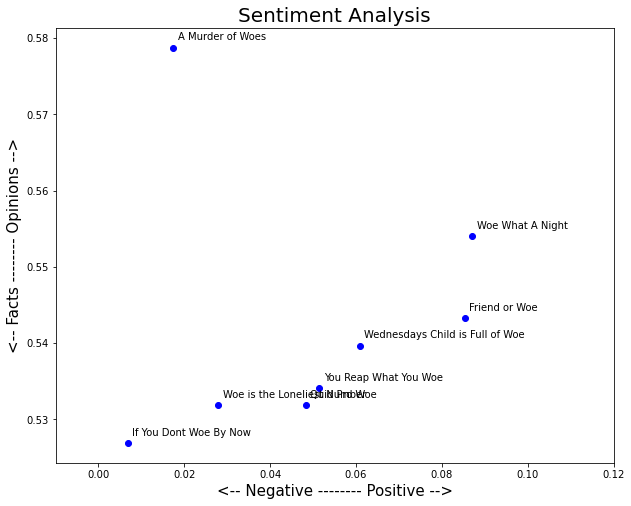

In [5]:
# Grafiquemos los resultados
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_chapter'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Rutina de Sentimiento a lo largo del tiempo

En lugar de mirar el sentimiento general, veamos si hay algo interesante sobre el sentimiento a lo largo del tiempo a lo largo de cada rutina.

In [6]:
# Divide cada rutina en 10 partes
import numpy as np
import math

def split_text(text, n=10):
    '''Toma una cadena de texto y la divide en n partes iguales, con un valor predeterminado de 10 partes iguales.'''

    # Calcule la longitud del texto, el tamaño de cada fragmento de texto y los puntos de inicio de cada fragmento de texto
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Extraiga fragmentos de texto del mismo tamaño y póngalos en una lista
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [7]:
# Echemos un vistazo a nuestros datos de nuevo
data

,transcript,full_chapter,polarity,subjectivity
T1C1,"Original release date: November 23, 2022 Wedne...",Wednesdays Child is Full of Woe,0.060885,0.539684
T1C2,"Original release date: November 23, 2022 Wedne...",Woe is the Loneliest Number,0.027939,0.531898
T1C3,"Original release date: November 23, 2022 Wedne...",Friend or Woe,0.085286,0.543293
T1C4,"Original release date: November 23, 2022 Wedne...",Woe What A Night,0.087109,0.554059
T1C5,"Original release date: November 23, 2022 32 ye...",You Reap What You Woe,0.051471,0.534134
T1C6,"Original release date: November 23, 2022 Wedne...",Quid Pro Woe,0.048351,0.531858
T1C7,"Original release date: November 23, 2022 At Ma...",If You Dont Woe By Now,0.006867,0.526912
T1C8,"Original release date: November 23, 2022 Wedne...",A Murder of Woes,0.017459,0.578719


In [8]:
# Vamos a crear una lista para contener todas las piezas de texto
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Original release date: November\xa023,\xa02022 Wednesday Addams, a high-school student, finds her brother\xa0Pugsley\xa0tied up in a locker. She sees a psychic vision of his bullies whom she attempts to kill in revenge but gets expelled. Her parents,\xa0Morticia\xa0and\xa0Gomez, decide to enroll her in Nevermore Academy, a school for outcasts. Meanwhile, a hiker is killed by an unknown creature near Nevermore. Wednesday’s parents release\xa0Thing, a sentient disembodied hand, to watch over her. She meets her roommate Enid, her complete opposite, and duels with Bianca, the popular girl, after she bullies another boy, Rowan. Later, Wednesday is nearly killed by a falling gargoyle but is saved by Bianca’s ex-boyfriend Xavier. After escaping her court-ordered therapy session, Wednesday meets Tyler, who agrees to help her escape from Nevermore. However, she is apprehended by principal Larissa Weems and taken back to the school. Later, Tyler and Wednesday meet at the local fair, and Wedne

In [ ]:
# La lista tiene 10 elementos, uno para cada transcripción.
len(list_pieces)

12

In [ ]:
# Cada transcripción se ha dividido en 10 piezas de texto.
len(list_pieces[0])

10

In [9]:
# Calcular la polaridad de cada fragmento de texto

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.12164634146341463,
  0.17939297309833022,
  0.116003620864732,
  0.11100557244174267,
  0.00887990416292303,
  -0.010646167557932277,
  0.026388888888888896,
  0.04300843253968255,
  0.03836427226257734,
  -0.07625992063492064],
 [-0.011136712749615975,
  0.10612745098039217,
  -0.09125763125763124,
  0.08746657754010696,
  0.1427565836940837,
  -0.07758733514547468,
  -0.03298013923013923,
  0.004466705381339531,
  0.06204671839896071,
  0.07287353946208111],
 [0.0456980100003356,
  0.0998907553798858,
  0.19966517857142857,
  0.2287169312169312,
  0.06626602564102568,
  0.06759161998132587,
  0.044357141271814116,
  0.07129041171594365,
  -0.010158232572025692,
  -0.03294270833333332],
 [0.07987452926477319,
  0.17265625,
  0.1865849758706902,
  0.014141604010025058,
  -0.024204604918890635,
  0.2054861111111111,
  0.12094080687830687,
  0.016253753753753743,
  0.13075344611528822,
  -0.1014030612244898],
 [0.10818903318903317,
  0.06994273088023087,
  0.09733862433862435,
  0.05

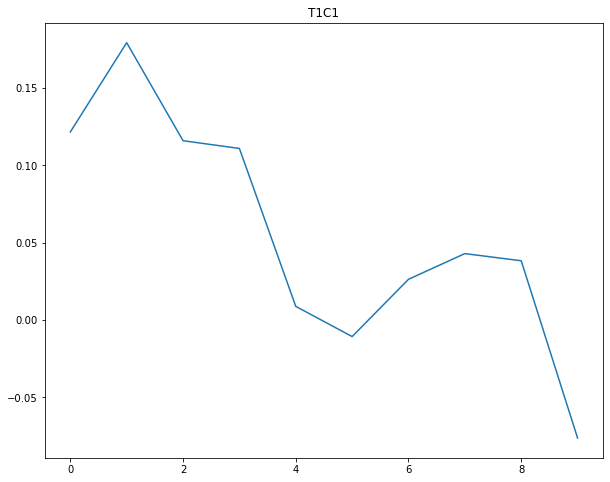

In [11]:
# Mostrar la trama de un comediante
plt.plot(polarity_transcript[0])
plt.title(data['full_chapter'].index[0])
plt.show()

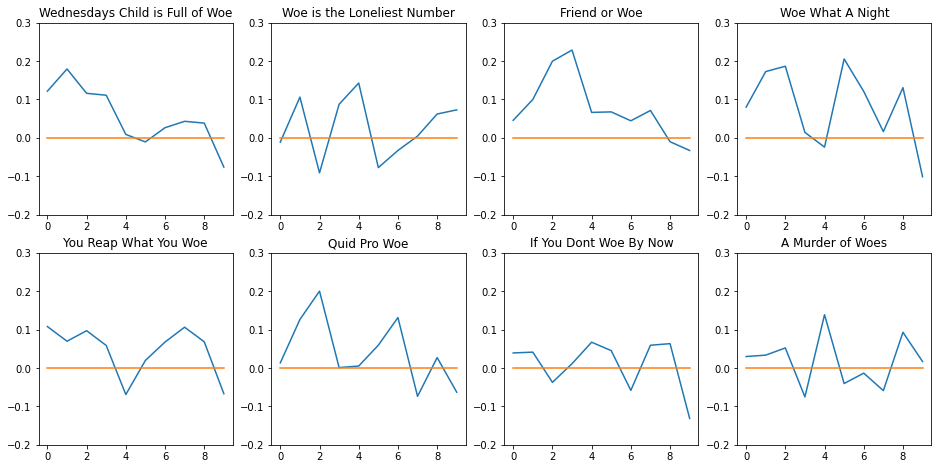

In [12]:
# Mostrar la trama para todos los comediantes
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_chapter'][index])
    plt.ylim(bottom=-.2, top=.3)
    
plt.show()

Ali Wong se mantiene generalmente positiva a lo largo de su rutina. Comediantes similares son Louis C.K. y Mike Birbiglia.

Por otro lado, aquí tienes algunos patrones bastante diferentes, como Bo Burnham, que se vuelve más feliz a medida que pasa el tiempo, y Dave Chappelle, que tiene algunos momentos bastante bajos en su rutina.